<a href="https://colab.research.google.com/github/Sineme01/2001CB07_CS299_2022/blob/main/House_Rate_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Load Data**


**Name**      : **Anand Kumar**

**Roll        :   2001CB07**

**Institute   :   Indian Institute Of Technology Patna.**

**House Rate Prediction**

**Data is taken from Kaggle.**

**Description :** The aim of the project is to predict the selling price of houses depending on various features. Two files, train, and test are provided and the price of the test data is to be estimated. 

First lets import all the libraries that will be used to load train and test datasets and data manipulation.

In [277]:
# Import libraries

# Pandas 
import pandas as pd
from pandas import Series,DataFrame 

# Numpy and Matplotlib
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
#sns.set_style('whitegrid')
%matplotlib inline

# Machine Learning 
from sklearn import preprocessing

In [278]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading train and test data

In [279]:
# Get Data in Dataframe 
train = pd.read_csv('/content/drive/MyDrive/CS_INNOVATION_LAB/house_train_.csv')
test = pd.read_csv('/content/drive/MyDrive/CS_INNOVATION_LAB/house_test_.csv')

Preview of train and test data

In [280]:
# head() shows the first 5 rows of the data
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [281]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


There are 1460 entries in the train data set and 1459 entries in test data set. The data contains some NaN values too.

In [282]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [283]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

**2. Data Manipulation and Visualization**

Lets check for NaN (null) values in the data

In [284]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [285]:
test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

Lets check for the mean, standard deviation for Sales price

In [286]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Sales price is right skewed. So, we perform log transformation so that the skewness is nearly zero.

Skew is: 1.8828757597682129


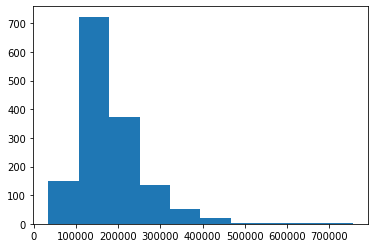

Skew is: 0.12134661989685329


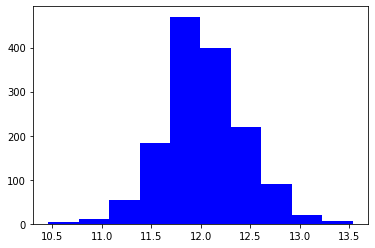

In [287]:
# Determining the Skewness of data 
print ("Skew is:", train.SalePrice.skew())

plt.hist(train.SalePrice)
plt.show()

# After log transformation of the data it looks much more center aligned
train['Skewed_SP'] = np.log(train['SalePrice']+1)
print ("Skew is:", train['Skewed_SP'].skew())
plt.hist(train['Skewed_SP'], color='blue')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the onl

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

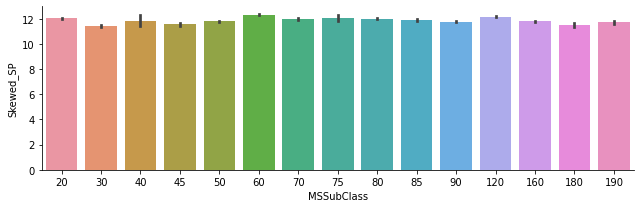

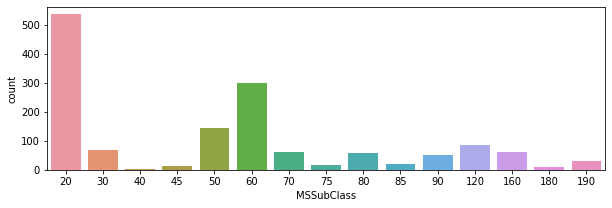

In [288]:
sns.factorplot('MSSubClass', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot('MSSubClass', data=train)
train['MSSubClass'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

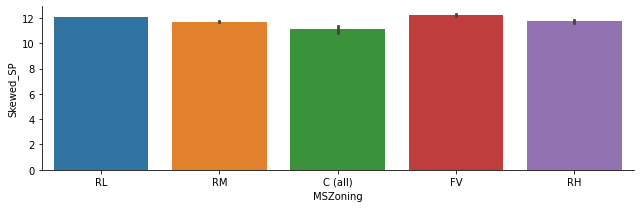

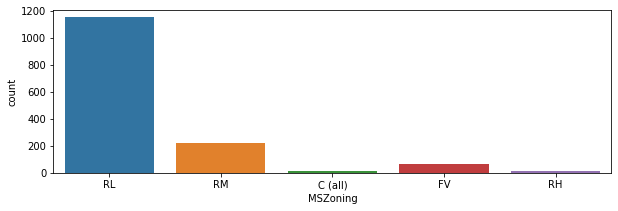

In [289]:
sns.factorplot('MSZoning', 'Skewed_SP', data=train,kind='bar',size=3,aspect=3)
fig, (axis1) = plt.subplots(1,1,figsize=(10,3))
sns.countplot(x='MSZoning', data=train, ax=axis1)
train['MSZoning'].value_counts()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


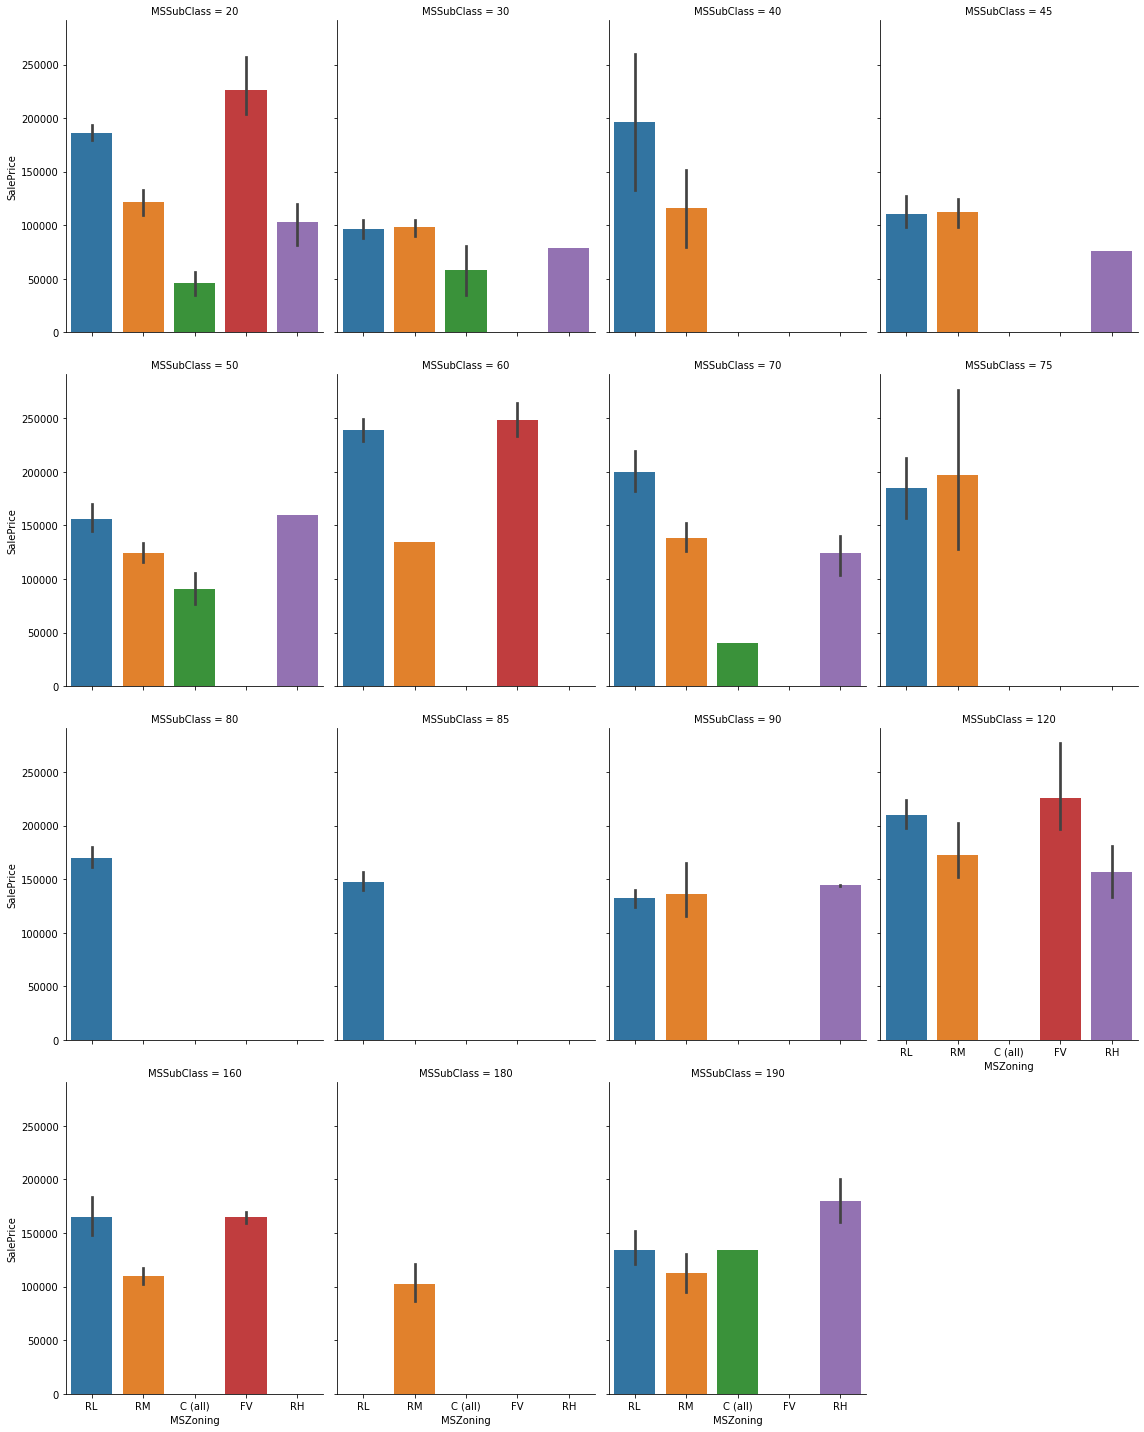

In [290]:
sns.factorplot(x='MSZoning', y='SalePrice', col='MSSubClass', data=train, kind='bar', col_wrap=4, aspect=0.8)

Lets analyze the numeric features using the numpy library

In [291]:
numerical_features = train.select_dtypes(include=[np.number])
numerical_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
Skewed_SP        float64
dtype: object

In [292]:
# Then we will try to find the corretation between the feature and target
corr = numerical_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])
print (corr['SalePrice'].sort_values(ascending=False)[:], '\n')


SalePrice      1.000000
Skewed_SP      0.948374
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64
SalePrice        1.000000
Skewed_SP        0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea

We will analyze the features in their descending of correlation with sales price

In [293]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [294]:
#Creating a pivot table 
quality_pivot = train.pivot_table(index='OverallQual',values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


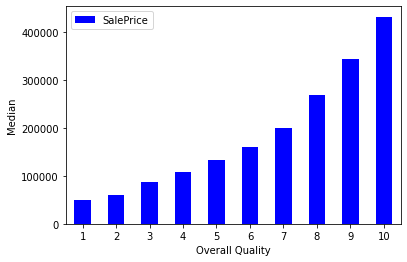

In [295]:
quality_pivot.plot(kind='bar',color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median')
plt.xticks(rotation=0)
plt.show()

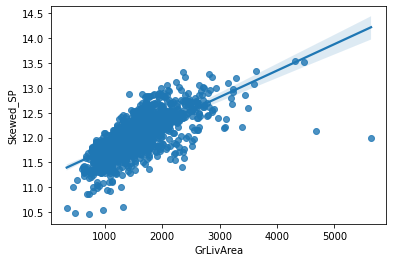

In [296]:
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train)

SalePrice increases as the GrLivArea increases. We will also get rid of the outliers which severely affect the prediction of the survival rate.

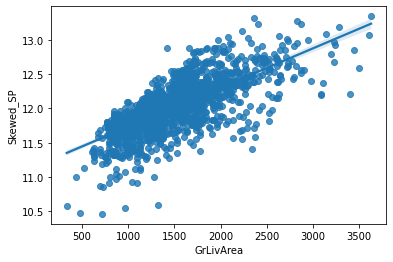

In [297]:
#Removing outliers
train = train[train['GrLivArea'] < 4000]
sns.regplot(x='GrLivArea',y='Skewed_SP',data=train)

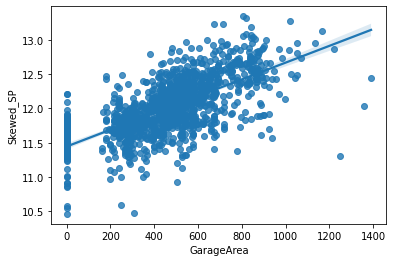

In [298]:
sns.regplot(x='GarageArea',y='Skewed_SP',data=train)

GarageArea and SalePrice are directly proportional.

We will again get rid of the outliers.

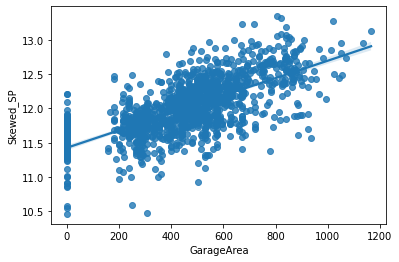

In [299]:
#Removing outliers
train = train[train['GarageArea'] < 1200]
sns.regplot(x='GarageArea',y='Skewed_SP',data=train)

In [300]:
#Removing the null values
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1447
MiscFeature,1399
Alley,1361
Fence,1172
FireplaceQu,689
LotFrontage,258
GarageType,81
GarageYrBlt,81
GarageCond,81


In [301]:
# Pool null value refers to no pool area
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [302]:
#Analysing the non numeric data 
categoricals = train.select_dtypes(exclude=[np.number])
categoricals.describe(include='all')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1452,1452,91,1452,1452,1452,1452,1452,1452,1452,...,1371,1371,1371,1371,1452,5,280,53,1452,1452
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Fa,MnPrv,Shed,WD,Normal
freq,1144,1447,50,921,1307,1451,1047,1375,225,1255,...,865,605,1303,1318,1332,2,156,48,1264,1195


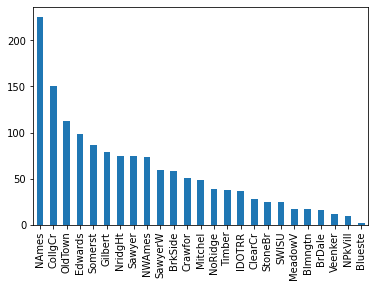

In [303]:
train['Neighborhood'].value_counts().plot(kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


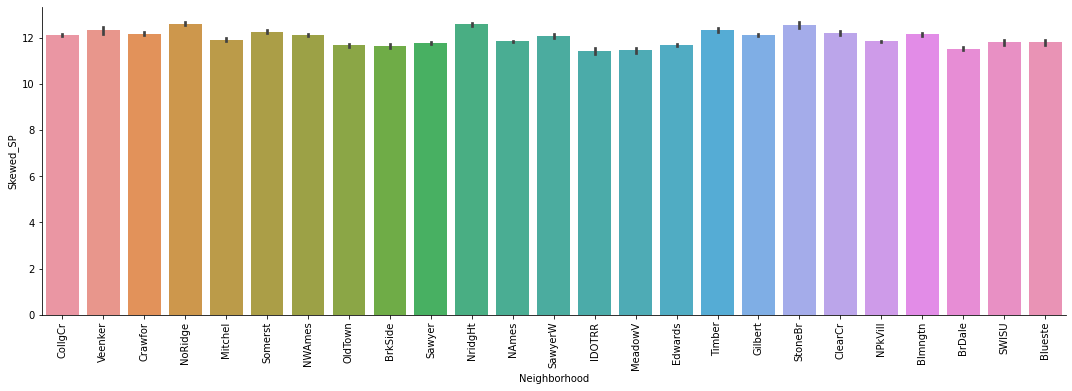

In [304]:
g = sns.factorplot(x='Neighborhood', y='Skewed_SP', data=train, kind='bar', aspect=3)
g.set_xticklabels(rotation=90)

In [305]:
train['Condition1'].value_counts()

Norm      1255
Feedr       80
Artery      48
RRAn        26
PosN        17
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [306]:

train['Condition2'].value_counts()

Norm      1439
Feedr        6
Artery       2
RRNn         2
PosA         1
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


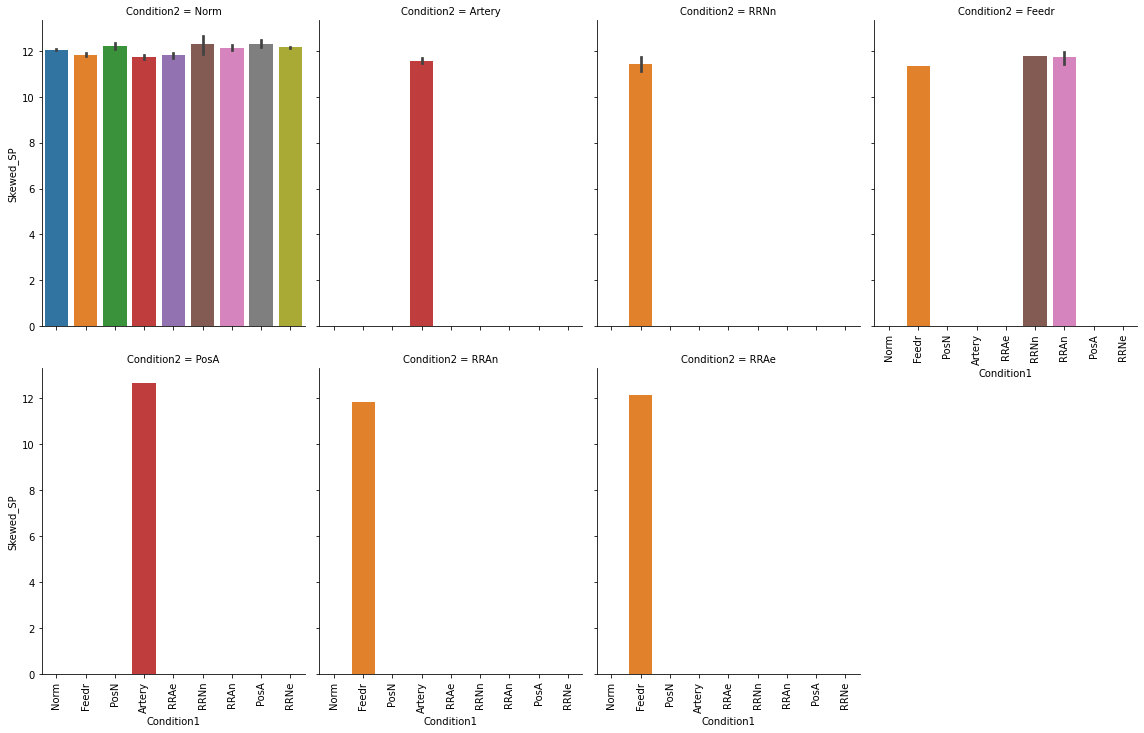

In [307]:
g = sns.factorplot(x='Condition1', y='Skewed_SP', col='Condition2', data=train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [308]:

train['SaleCondition'].value_counts()

Normal     1195
Partial     121
Abnorml     100
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [309]:
train['SaleType'].value_counts()

WD       1264
New       118
COD        43
ConLD       8
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


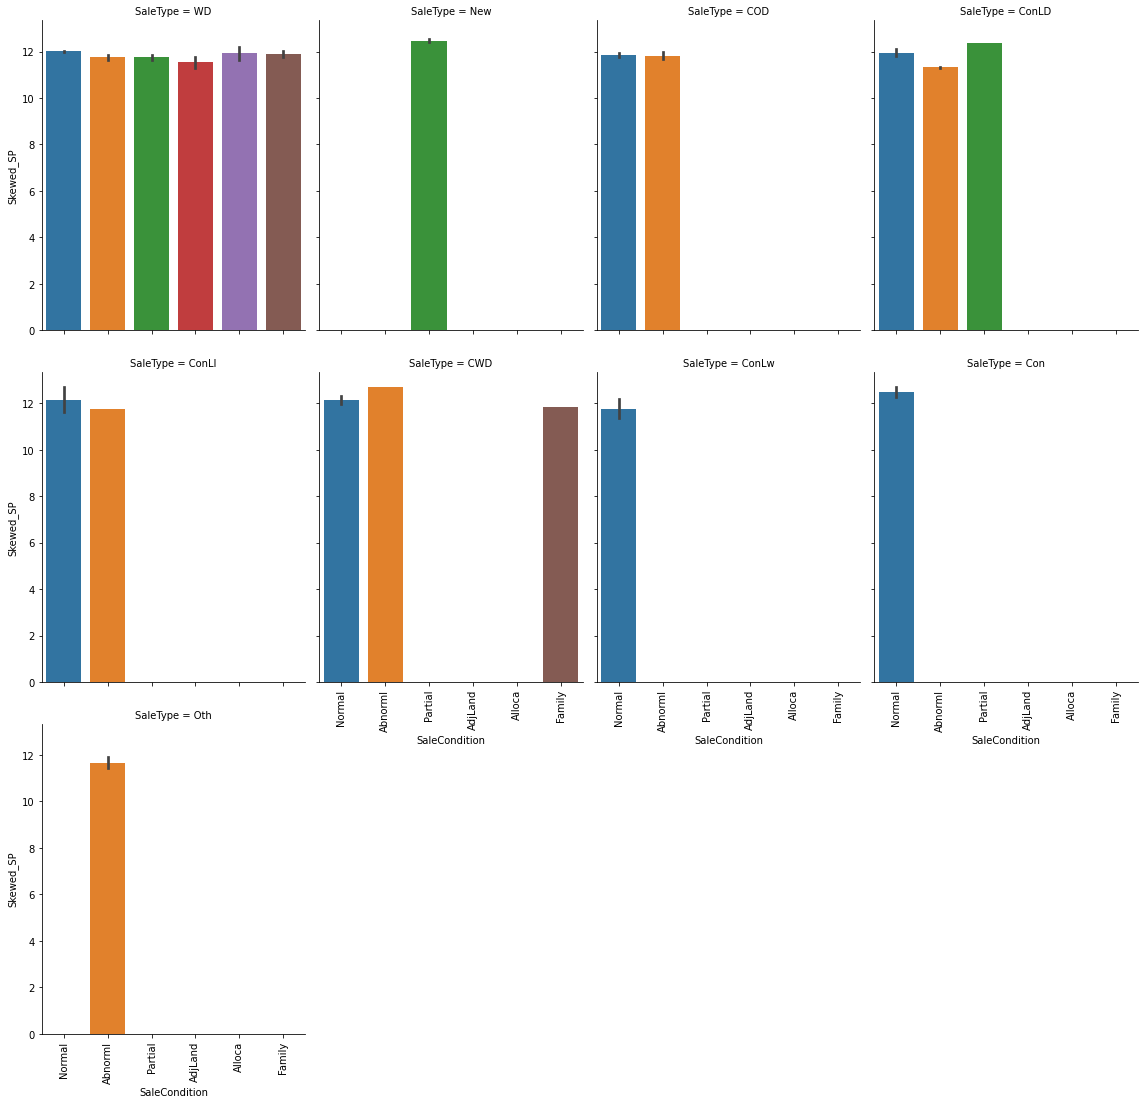

In [310]:
g = sns.factorplot(x='SaleCondition', y='Skewed_SP', col='SaleType', data=train, kind='bar', col_wrap=4, aspect=0.8)
g.set_xticklabels(rotation=90)

In [311]:
#Data Trasformation 
print ("Original: \n") 
print (train.value_counts(), "\n")

Original: 

Series([], dtype: int64) 



In [312]:
# Turn into one hot encoding 
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)

In [313]:
# Encoded 
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1447
0       5
Name: enc_street, dtype: int64


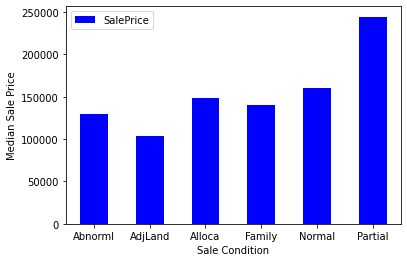

In [314]:
# Feature Engineering
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

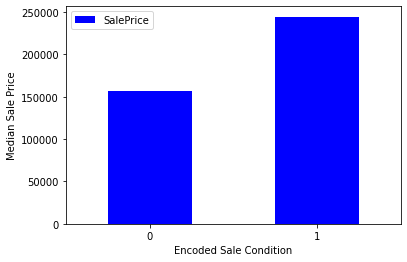

In [315]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='blue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [316]:
#Interpolation of data 
data = train.select_dtypes(include=[np.number]).interpolate().dropna()

In [317]:
sum(data.isnull().sum() != 0)

0

In [318]:
# Linear Model for the  train and test
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.33)

In [320]:
from sklearn import linear_model
from sklearn import ensemble

lr2 =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
lr3 = linear_model.LinearRegression()
lr = ensemble.GradientBoostingRegressor()
lr4 = linear_model.TheilSenRegressor()
lr5 = linear_model.RANSACRegressor(random_state=50)
lr6 = linear_model.Lasso()

In [321]:
model = lr.fit(X_train, y_train)

In [322]:
print ("R^2 is: \n", model.score(X_test, y_test))
rsq1 = model.score(X_test, y_test)

R^2 is: 
 0.9997716597040258


In [323]:
predictions = model.predict(X_test)

In [324]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))
rmse1 = mean_squared_error(y_test, predictions)

RMSE is: 
 3.528610050045259e-05


In [325]:
from sklearn.metrics import mean_absolute_error
print("MAE is: \n", mean_absolute_error(y_test,predictions))
mae1 = mean_absolute_error(y_test,predictions)

MAE is: 
 0.0035906244503419358


Text(0.5, 1.0, 'Gradient Boosting Regression Model')

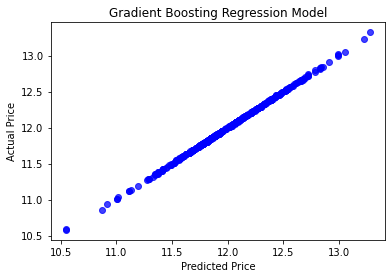

In [326]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Gradient Boosting Regression Model')
#pltrandom_state=None.show()

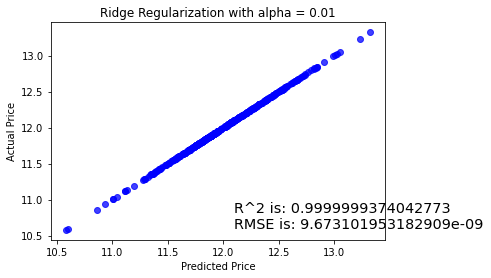

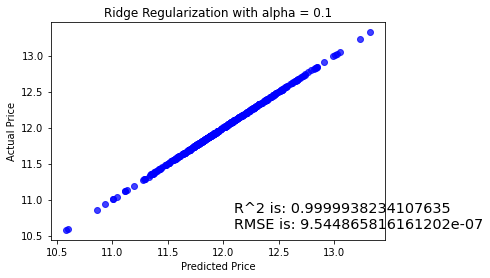

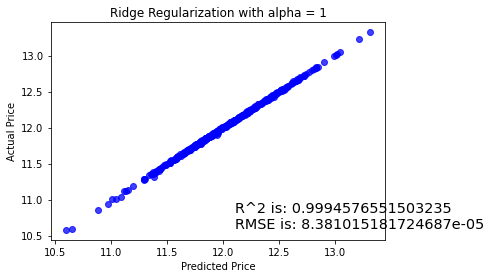

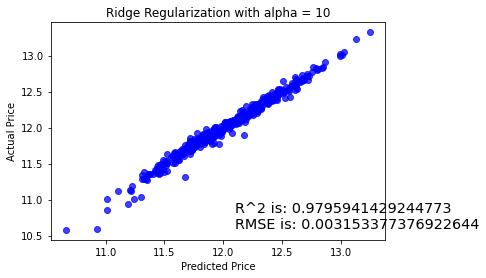

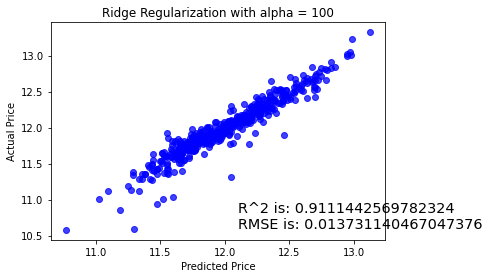

In [327]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [328]:

submission = pd.DataFrame()
submission['Id'] = test.Id
submission

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [329]:
feats = test.select_dtypes(
        include=[np.number]).interpolate()
feats

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,enc_street,enc_condition
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,0,0,0,120,0,0,6,2010,1.0,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,36,0,0,0,0,12500,6,2010,1.0,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,34,0,0,0,0,0,3,2010,1.0,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,36,0,0,0,0,0,6,2010,1.0,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,82,0,0,144,0,0,1,2010,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,...,0,0,0,0,0,0,6,2006,1.0,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,...,24,0,0,0,0,0,4,2006,1.0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,...,0,0,0,0,0,0,9,2006,1.0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,...,32,0,0,0,0,700,7,2006,1.0,0


In [330]:
predictions = model.predict(feats)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names seen at fit time, yet now missing:
- Skewed_SP

  warnings.warn(message, FutureWarning)


In [331]:
final_predictions = np.exp(predictions)

In [332]:
print ("Original predictions are: \n", predictions, "\n")
print ("Final predictions are: \n", final_predictions)

Original predictions are: 
 [13.28222948 13.28197266 13.28241277 ... 13.28222948 13.28601029
 13.28241277] 

Final predictions are: 
 [586676.87500821 586526.22521403 586784.41986688 ... 586676.87500821
 588899.1860354  586784.41986688]


In [333]:
submission['SalePrice1'] = final_predictions
submission.head()

,Id,SalePrice1
0,1461,586676.875008
1,1462,586526.225214
2,1463,586784.419867
3,1464,586784.419867
4,1465,593076.529598


In [334]:
final = pd.DataFrame()
final.index = ["RSquare","RMSE","MAE"]

In [335]:
list1 = [rsq1,rmse1,mae1]
final["Gradient Boosting Regression"] = list1
final

,Gradient Boosting Regression
RSquare,0.999772
RMSE,0.000035
MAE,0.003591


---->>>>>  Algo 2   **Random Forest Regressor**

In [336]:
model2 = lr2.fit(X_train, y_train)
rsq2 = model2.score(X_test, y_test)
predictions2 = model2.predict(X_test)
rmse2 = mean_squared_error(y_test, predictions2)
mae2 = mean_absolute_error(y_test,predictions2)
feats2 = test.select_dtypes(
        include=[np.number]).interpolate()
predictions2 = model2.predict(feats2)
final_predictions2 = np.exp(predictions2)
submission['SalePrice2'] = final_predictions2
list2 = [rsq2,rmse2,mae2]
final["Random Forest Regression"] = list2
final


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names seen at fit time, yet now missing:
- Skewed_SP

  warnings.warn(message, FutureWarning)


,Gradient Boosting Regression,Random Forest Regression
RSquare,0.999772,0.836846
RMSE,0.000035,0.025213
MAE,0.003591,0.095745


---->>>>> Algo 3 **Linear Regression**



In [337]:
#lr2 =  ensemble.RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,random_state =50,max_features = "sqrt", min_samples_leaf = 50)
#lr3 = linear_model.LinearRegression()
#lr = ensemble.GradientBoostingRegressor()
#lr4 = linear_model.TheilSenRegressor()
#lr5 = linear_model.RANSACRegressor(random_state=50)

In [338]:
model3 = lr3.fit(X_train, y_train)
rsq3 = model3.score(X_test, y_test)
predictions3 = model3.predict(X_test)
rmse3 = mean_squared_error(y_test, predictions3)
mae3 = mean_absolute_error(y_test,predictions3)
feats3 = test.select_dtypes(
        include=[np.number]).interpolate()
predictions3 = model3.predict(feats3)
final_predictions3 = np.exp(predictions3)
submission['SalePrice3'] = final_predictions3
list3 = [rsq3,rmse3,mae3]
final["Linear Regression"] = list3
final

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names seen at fit time, yet now missing:
- Skewed_SP

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


,Gradient Boosting Regression,Random Forest Regression,Linear Regression
RSquare,0.999772,0.836846,1.000000e+00
RMSE,0.000035,0.025213,7.010729e-13
MAE,0.003591,0.095745,4.976863e-07


---->>>>> Algo 4 **Theil Sen Regressor**

In [339]:
model4 = lr4.fit(X_train, y_train)
rsq4 = model4.score(X_test, y_test)
predictions4 = model4.predict(X_test)
rmse4 = mean_squared_error(y_test, predictions4)
mae4 = mean_absolute_error(y_test,predictions4)
feats4 = test.select_dtypes(
        include=[np.number]).interpolate()
predictions4 = model4.predict(feats4)
final_predictions4 = np.exp(predictions4)
submission['SalePrice4'] = final_predictions4
list4 = [rsq4,rmse4,mae4]
final["Theil Sen Regressor"] = list4
final

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names seen at fit time, yet now missing:
- Skewed_SP

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Theil Sen Regressor
RSquare,0.999772,0.836846,1.000000e+00,1.000000e+00
RMSE,0.000035,0.025213,7.010729e-13,2.779562e-12
MAE,0.003591,0.095745,4.976863e-07,6.114816e-07


---->>>>> Algo 4 **RANSAC Regressor**

In [340]:
model5 = lr5.fit(X_train, y_train)
rsq5 = model5.score(X_test, y_test)
predictions5 = model5.predict(X_test)
rmse5 = mean_squared_error(y_test, predictions5)
mae5 = mean_absolute_error(y_test,predictions5)
feats5 = test.select_dtypes(
        include=[np.number]).interpolate()
predictions5 = model5.predict(feats5)
final_predictions5 = np.exp(predictions5)
submission['SalePrice5'] = final_predictions5
list5 = [rsq5,rmse5,mae5]
final["RANSAC Regressor"] = list5
final

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names seen at fit time, yet now missing:
- Skewed_SP

  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Theil Sen Regressor,RANSAC Regressor
RSquare,0.999772,0.836846,1.000000e+00,1.000000e+00,1.000000e+00
RMSE,0.000035,0.025213,7.010729e-13,2.779562e-12,7.010729e-13
MAE,0.003591,0.095745,4.976863e-07,6.114816e-07,4.976863e-07


-------->>>>>>>    Algo 6 **Lasso Regression**

In [341]:
model6 = lr6.fit(X_train, y_train)
rsq6 = model6.score(X_test, y_test)
predictions6 = model6.predict(X_test)
rmse6 = mean_squared_error(y_test, predictions6)
mae6 = mean_absolute_error(y_test,predictions6)
feats6 = test.select_dtypes(
        include=[np.number]).interpolate()
predictions6 = model6.predict(feats6)
final_predictions6 = np.exp(predictions6)
submission['SalePrice6'] = final_predictions6
list6 = [rsq6,rmse6,mae6]
final["Lasso Regression"] = list6
final

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names seen at fit time, yet now missing:
- Skewed_SP

  warnings.warn(message, FutureWarning)


,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Theil Sen Regressor,RANSAC Regressor,Lasso Regression
RSquare,0.999772,0.836846,1.000000e+00,1.000000e+00,1.000000e+00,0.797330
RMSE,0.000035,0.025213,7.010729e-13,2.779562e-12,7.010729e-13,0.031319
MAE,0.003591,0.095745,4.976863e-07,6.114816e-07,4.976863e-07,0.120196


---->>>>  Algo 7 **Decision Tree**

In [342]:
from sklearn.tree import DecisionTreeRegressor
tr_regressor = DecisionTreeRegressor(random_state=0)
model7 = tr_regressor.fit(X_train, y_train)
rsq7 = model7.score(X_test, y_test)
predictions7 = model7.predict(X_test)
rmse7 = mean_squared_error(y_test, predictions7)
mae7 = mean_absolute_error(y_test,predictions7)
feats7 = test.select_dtypes(
        include=[np.number]).interpolate()
predictions7 = model7.predict(feats7)
final_predictions7 = np.exp(predictions7)
submission['SalePrice7'] = final_predictions7
list7 = [rsq7,rmse7,mae7]
final["Decision Tree"] = list7
final

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names seen at fit time, yet now missing:
- Skewed_SP

  warnings.warn(message, FutureWarning)


,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Theil Sen Regressor,RANSAC Regressor,Lasso Regression,Decision Tree
RSquare,0.999772,0.836846,1.000000e+00,1.000000e+00,1.000000e+00,0.797330,0.998937
RMSE,0.000035,0.025213,7.010729e-13,2.779562e-12,7.010729e-13,0.031319,0.000164
MAE,0.003591,0.095745,4.976863e-07,6.114816e-07,4.976863e-07,0.120196,0.003604


----->>>> Algo 8 **Support Vector Regression**

In [343]:
from sklearn.svm import SVR
lr8 = SVR(kernel = 'rbf')
model8 = lr8.fit(X_train, y_train)
rsq8 = model8.score(X_test, y_test)
predictions8 = model8.predict(X_test)
rmse8 = mean_squared_error(y_test, predictions8)
mae8 = mean_absolute_error(y_test,predictions8)
feats8 = test.select_dtypes(
        include=[np.number]).interpolate()
predictions8 = model8.predict(feats8)
final_predictions8 = np.exp(predictions8)
submission['SalePrice8'] = final_predictions8
list8 = [rsq8,rmse8,mae8]
final["Support Vector Regression"] = list8
final

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Id
Feature names seen at fit time, yet now missing:
- Skewed_SP

  warnings.warn(message, FutureWarning)


,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Theil Sen Regressor,RANSAC Regressor,Lasso Regression,Decision Tree,Support Vector Regression
RSquare,0.999772,0.836846,1.000000e+00,1.000000e+00,1.000000e+00,0.797330,0.998937,0.731076
RMSE,0.000035,0.025213,7.010729e-13,2.779562e-12,7.010729e-13,0.031319,0.000164,0.041558
MAE,0.003591,0.095745,4.976863e-07,6.114816e-07,4.976863e-07,0.120196,0.003604,0.142925


In [344]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [345]:
import catboost
from catboost import CatBoostRegressor
lr9 =CatBoostRegressor(iterations=1000, learning_rate=0.05,  loss_function='RMSE', logging_level='Silent')
model9 = lr9.fit(X_train, y_train)
rsq9 = model9.score(X_test, y_test)
predictions9 = model9.predict(X_test)
rmse9 = mean_squared_error(y_test, predictions9)
mae9 = mean_absolute_error(y_test,predictions9)
feats9 = X.interpolate()
predictions9 = model9.predict(feats9)
final_predictions9 = np.exp(predictions9)
list9 = [rsq9,rmse9,mae9]
final["Catboost Regression"] = list9
final

,Gradient Boosting Regression,Random Forest Regression,Linear Regression,Theil Sen Regressor,RANSAC Regressor,Lasso Regression,Decision Tree,Support Vector Regression,Catboost Regression
RSquare,0.999772,0.836846,1.000000e+00,1.000000e+00,1.000000e+00,0.797330,0.998937,0.731076,0.997354
RMSE,0.000035,0.025213,7.010729e-13,2.779562e-12,7.010729e-13,0.031319,0.000164,0.041558,0.000409
MAE,0.003591,0.095745,4.976863e-07,6.114816e-07,4.976863e-07,0.120196,0.003604,0.142925,0.011368


In [346]:
final.to_csv('final_submission.csv', index=False)

In [347]:
submission.to_csv('Anand_houseprice_submission.csv', index=False)